In [ ]:
!pip install wget==3.2

In [2]:
import wget

wget.download(
    url='https://archive.ics.uci.edu/ml/machine-learning-databases/' + \
 '00312/dow_jones_index.zip',
 out='./dados.zip'
)

'./dados.zip'

In [3]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

In [4]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

# **Pandas**

In [ ]:
!pip install pandas==1.1.5

In [7]:
import pandas as pd

df = pd.read_csv('./dados/dow_jones_index.csv')


In [ ]:
# Visualizando as n primeiras linhas

df.head(n=10)

In [ ]:
# Visualizando o nome das colunas

df.columns.to_list()

In [ ]:
# Verificando o número de linhas e colunas

linhas, colunas = df.shape
print(f'Número de linhas: {linhas}')
print(f'Número de colunas: {colunas}')

## **Seleção de valores de abertura, fechamento, máximo e mínimo das ações da McDonalds, listado na Dow Jones como KO**

In [ ]:
# Selecionando as linha do dataframe original df em que a coluna stock é igual a MCD

df_mcd = df[df['stock'] == 'MCD']

# Selecionando apensa as colunas de data e valores de ações

df_mcd = df_mcd[['date', 'open', 'high', 'low', 'close']]

df_mcd.head(n=10)

df_mcd.dtypes

for col in ['open', 'high', 'low', 'close']:
  df_mcd[col] = df_mcd[col].apply(
      lambda value: float(value.split(sep='$')[-1])
  )

In [ ]:
df_mcd.head(n=10)

In [ ]:
df_mcd.dtypes

## **Seleção de valores de abertura, fechamento, máximo e mínimo das ações da Coca Cola, listado na Dow Jones como KO**

In [22]:
# Selecionando as linha do dataframe original df em que a coluna stock é igual a KO

df_ko = df[df['stock'] == 'KO']

# Selecionando apenas as colunas de data e valores de ações

df_ko = df[['date', 'open', 'high', 'low', 'close']]


In [ ]:
df_ko.head(n=10)

In [ ]:
df_ko.dtypes

In [ ]:
for col in ['open', 'high', 'low', 'close']:
  df_ko[col] = df_ko[col].apply(
      lambda value: float(value.split(sep='$')[-1])
  )

In [ ]:
# Visualisação dos dados

df_ko.head(n=10)

In [ ]:
# Visualisação dos tipos de dados

df_ko.dtypes

# **Seadorn**

In [ ]:
!pip install seaborn==0.11.1

## **Visualização dos dados da McDonalds**

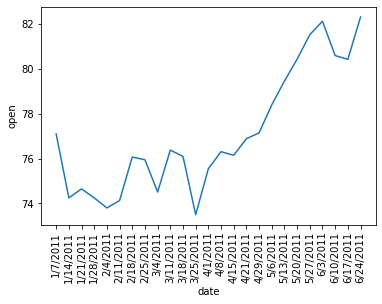

In [32]:
import seaborn as sns

# Visualisação dos valores de abertura das ações ao longo do tempo

plot = sns.lineplot(x="date", y="open", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

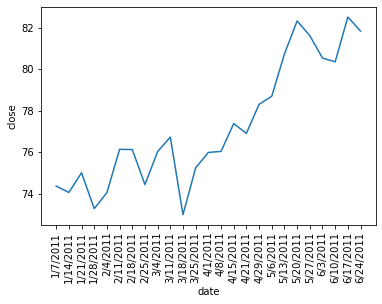

In [33]:
# Visualisação dos valores de fechamento das ações ao longo do tempo

plot = sns.lineplot(x="date", y="close", data=df_mcd)
_ = plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

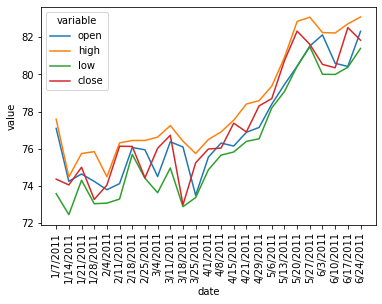

In [36]:
# Visualização dos quatros valores no mesmo grafico

plot = sns.lineplot(
    x="date",
    y="value",
    hue='variable',
    data=pd.melt(df_mcd, ['date'])
)

_= plot.set_xticklabels(labels=df_mcd['date'], rotation=90)

In [38]:
plot.figure.savefig("./mcd.png")

## **Visualização dos dados da Coca-Cola**

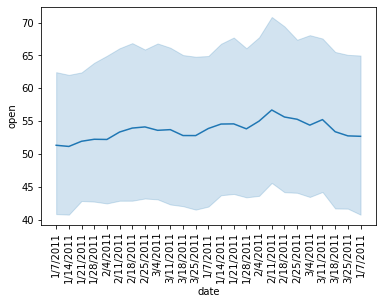

In [42]:
# Visualisação dos valores de abertura das ações ao longo do tempo

plot = sns.lineplot(x="date", y="open", data=df_ko)
_= plot.set_xticklabels(labels=df_ko['date'], rotation=90)

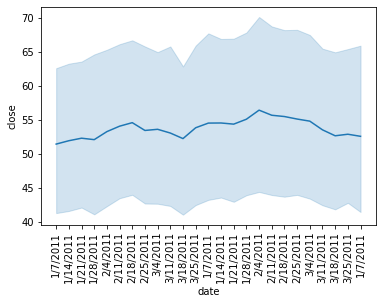

In [43]:
# Visualisação dos valores de fechamento das ações ao longo do tempo

plot = sns.lineplot(x="date", y="close", data=df_ko)
_= plot.set_xticklabels(labels=df_ko['date'], rotation=90)


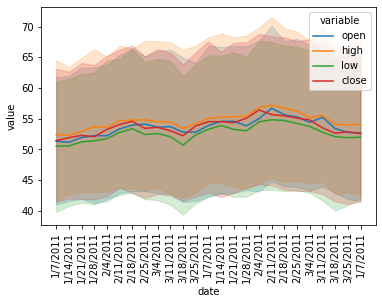

In [44]:
# Visualização dos quatros valores no mesmo grafico

plot = sns.lineplot(
    x="date",
    y="value",
    hue="variable",
    data=pd.melt(df_ko, ['date'])
)

_= plot.set_xticklabels(labels=df_ko['date'], rotation=90)

In [45]:
plot.figure.savefig("./ko.png")